<a href="https://colab.research.google.com/github/Serajummunira/Python-Projects/blob/main/ASRI_Project_Agri_%26_Food_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats


# Load the uploaded dataset

df = pd.read_csv('/content/drive/MyDrive/Aquaculture_Imports.csv')

# Display basic info and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627381 entries, 0 to 627380
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SOURCE_ID       627381 non-null  int64  
 1   HS_CODE         401523 non-null  float64
 2   COMMODITY_DESC  627381 non-null  object 
 3   GEOGRAPHY_CODE  627381 non-null  int64  
 4   GEOGRAPHY_DESC  627381 non-null  object 
 5   ATTRIBUTE_DESC  627381 non-null  object 
 6   UNIT_DESC       627381 non-null  object 
 7   YEAR_ID         627381 non-null  int64  
 8   TIMEPERIOD_ID   627381 non-null  int64  
 9   AMOUNT          627381 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 47.9+ MB


(None,
    SOURCE_ID      HS_CODE                                     COMMODITY_DESC  \
 0         58  302110000.0  TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...   
 1         58  302110000.0  TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...   
 2         58  302110000.0  TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...   
 3         58  302110000.0  TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...   
 4         58  302110000.0  TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...   
 
    GEOGRAPHY_CODE GEOGRAPHY_DESC  ATTRIBUTE_DESC UNIT_DESC  YEAR_ID  \
 0               1          World  US Import, QTY        KG     1989   
 1               1          World  US Import, QTY        KG     1989   
 2               1          World  US Import, QTY        KG     1989   
 3               1          World  US Import, QTY        KG     1989   
 4               1          World  US Import, QTY        KG     1989   
 
    TIMEPERIOD_ID  AMOUNT  
 0              1   46682  
 1             

In [2]:
df.head(10)

,SOURCE_ID,HS_CODE,COMMODITY_DESC,GEOGRAPHY_CODE,GEOGRAPHY_DESC,ATTRIBUTE_DESC,UNIT_DESC,YEAR_ID,TIMEPERIOD_ID,AMOUNT
0,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,1,46682
1,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,2,37354
2,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,3,26080
3,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,4,38737
4,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,5,25799
5,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,6,13514
6,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,7,24283
7,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,8,96941
8,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,9,25488
9,58,302110000.0,"TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...",1,World,"US Import, QTY",KG,1989,10,76691


In [3]:
df.shape

(627381, 10)

In [4]:
df.describe

<bound method NDFrame.describe of         SOURCE_ID      HS_CODE  \
0              58  302110000.0   
1              58  302110000.0   
2              58  302110000.0   
3              58  302110000.0   
4              58  302110000.0   
...           ...          ...   
627376         58  301110090.0   
627377         58  301110090.0   
627378         58  301110090.0   
627379         58  301190000.0   
627380         58  301190000.0   

                                           COMMODITY_DESC  GEOGRAPHY_CODE  \
0       TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...               1   
1       TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...               1   
2       TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...               1   
3       TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...               1   
4       TROUT (SALMO TRUTTA, S. CLARKI ETC) FRESH, CHI...               1   
...                                                   ...             ...   
627376                   ORNAMENTAL FRESHWATER FISH, LIVE            7970   
627377                   ORNAMENTAL FRESHWATER FISH, LIVE            7970   
627378                   ORNAMENTAL FRESHWATER FISH, LIVE            7970   
627379      ORNAMENTAL FISH (OTHER THAN FRESHWATER), LIVE            7970   
627380      ORNAMENTAL FISH (OTHER THAN FRESHWATER), LIVE            7970   

       GEOGRAPHY_DESC  ATTRIBUTE_DESC UNIT_DESC  YEAR_ID  TIMEPERIOD_ID  \
0               World  US Import, QTY        KG     1989              1   
1               World  US Import, QTY        KG     1989              2   
2               World  US Import, QTY        KG     1989              3   
3               World  US Import, QTY        KG     1989              4   
4               World  US Import, QTY        KG     1989              5   
...               ...             ...       ...      ...            ...   
627376         Malawi  US Import, VLU     U.S.$     2016              9   
627377         Malawi  US Import, VLU     U.S.$     2016             12   
627378         Malawi  US Import, VLU     U.S.$     2017              4   
627379         Malawi  US Import, VLU     U.S.$     2012              1   
627380         Malawi  US Import, VLU     U.S.$     2015              4   

        AMOUNT  
0        46682  
1        37354  
2        26080  
3        38737  
4        25799  
...        ...  
627376    3880  
627377    4453  
627378    3396  
627379    2926  
627380    4776  

[627381 rows x 10 columns]>

In [5]:
# First, clean the dataset:
# - Drop rows with missing commodity descriptions or year (critical for analysis)
# - Normalize commodity and geography names for clarity

# Drop rows where COMMODITY_DESC or YEAR_ID is missing (if any)
df_clean = df.dropna(subset=['COMMODITY_DESC', 'YEAR_ID'])

# Simplify strings by stripping whitespace
df_clean['COMMODITY_DESC'] = df_clean['COMMODITY_DESC'].str.strip()
df_clean['GEOGRAPHY_DESC'] = df_clean['GEOGRAPHY_DESC'].str.strip()

In [6]:
# Group total import amount by year
imports_by_year = df_clean.groupby('YEAR_ID')['AMOUNT'].sum().reset_index()

# Identify top 10 commodities by total amount imported
top_commodities = df_clean.groupby('COMMODITY_DESC')['AMOUNT'].sum().sort_values(ascending=False).head(10).reset_index()

# Identify top 10 countries by total import volume
# top_countries = df_clean.groupby('GEOGRAPHY_DESC')['AMOUNT'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries = (
    df_clean[df_clean['GEOGRAPHY_DESC'] != 'World']
    .groupby('GEOGRAPHY_DESC')['AMOUNT']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
imports_by_year, top_commodities, top_countries

(    YEAR_ID       AMOUNT
 0      1989  14219927594
 1      1990  14403436022
 2      1991  15511804362
 3      1992  16963612928
 4      1993  18508756512
 5      1994  21823609708
 6      1995  21770942698
 7      1996  21721911432
 8      1997  26040775644
 9      1998  28031247626
 10     1999  29304513034
 11     2000  34616180556
 12     2001  34303251834
 13     2002  34540178362
 14     2003  38487449664
 15     2004  38532624148
 16     2005  40670013184
 17     2006  47388443834
 18     2007  46545227390
 19     2008  48766710790
 20     2009  46674097226
 21     2010  51748856254
 22     2011  58825941420
 23     2012  54818456812
 24     2013  64015087460
 25     2014  76211487766
 26     2015  66480493394
 27     2016  69651817972
 28     2017  78025424780
 29     2018  78887736236
 30     2019  63412996900,
                                COMMODITY_DESC        AMOUNT
 0                               Shrimp, total  265533696556
 1                              Shrimp, froze

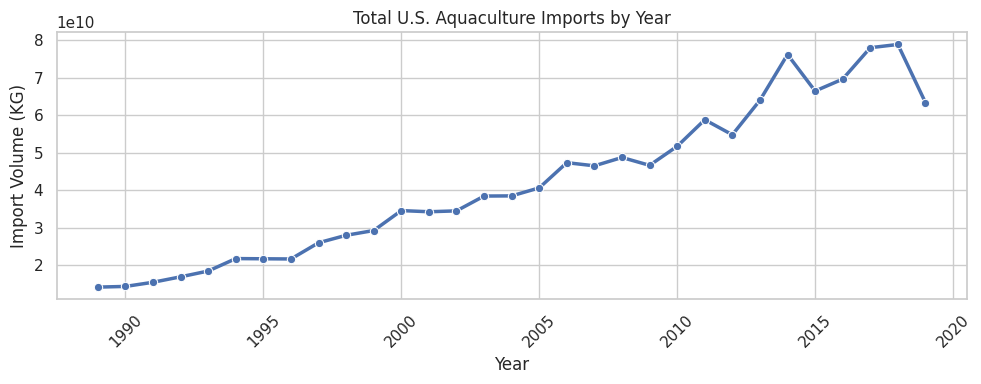

<ipython-input-7-2222994250>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_commodities, x='AMOUNT', y='COMMODITY_DESC', palette='viridis')


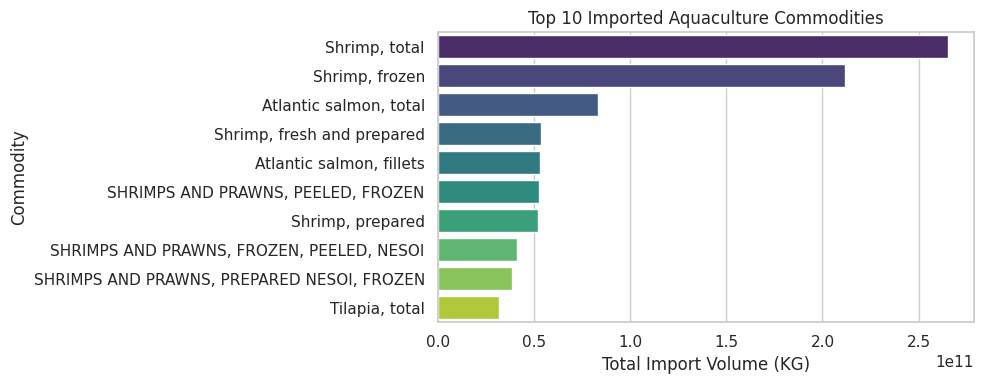

<ipython-input-7-2222994250>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='AMOUNT', y='GEOGRAPHY_DESC', palette='mako')


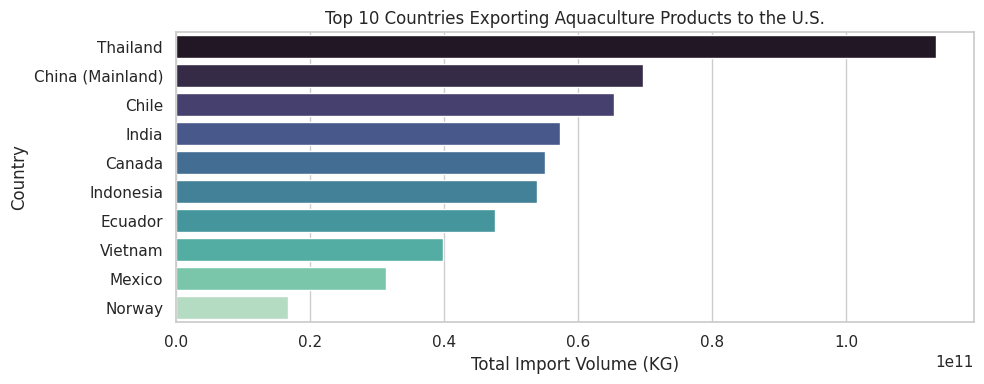

In [7]:

# Drop rows where COMMODITY_DESC or YEAR_ID is missing (if any)
df_clean = df.dropna(subset=['COMMODITY_DESC', 'YEAR_ID'])

# Simplify strings by stripping whitespace
df_clean['COMMODITY_DESC'] = df_clean['COMMODITY_DESC'].str.strip()
df_clean['GEOGRAPHY_DESC'] = df_clean['GEOGRAPHY_DESC'].str.strip()

# Group total import amount by year
imports_by_year = df_clean.groupby('YEAR_ID')['AMOUNT'].sum().reset_index()

# Identify top 10 commodities by total amount imported
top_commodities = df_clean.groupby('COMMODITY_DESC')['AMOUNT'].sum().sort_values(ascending=False).head(10).reset_index()

# Identify top 10 countries by total import volume
# top_countries = df_clean.groupby('GEOGRAPHY_DESC')['AMOUNT'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries = (
    df_clean[df_clean['GEOGRAPHY_DESC'] != 'World']
    .groupby('GEOGRAPHY_DESC')['AMOUNT']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Now generate the plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)

# 1. Line chart: Total imports by year
plt.figure()
sns.lineplot(data=imports_by_year, x='YEAR_ID', y='AMOUNT', marker='o', linewidth=2.5)
plt.title('Total U.S. Aquaculture Imports by Year')
plt.xlabel('Year')
plt.ylabel('Import Volume (KG)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar chart: Top 10 commodities by import volume
plt.figure()
sns.barplot(data=top_commodities, x='AMOUNT', y='COMMODITY_DESC', palette='viridis')
plt.title('Top 10 Imported Aquaculture Commodities')
plt.xlabel('Total Import Volume (KG)')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

# 3. Bar chart: Top 10 countries by import volume
plt.figure()
sns.barplot(data=top_countries, x='AMOUNT', y='GEOGRAPHY_DESC', palette='mako')
plt.title('Top 10 Countries Exporting Aquaculture Products to the U.S.')
plt.xlabel('Total Import Volume (KG)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


<ipython-input-8-1175732926>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_data, x='YEAR_ID', y='AMOUNT', palette='Blues_d')


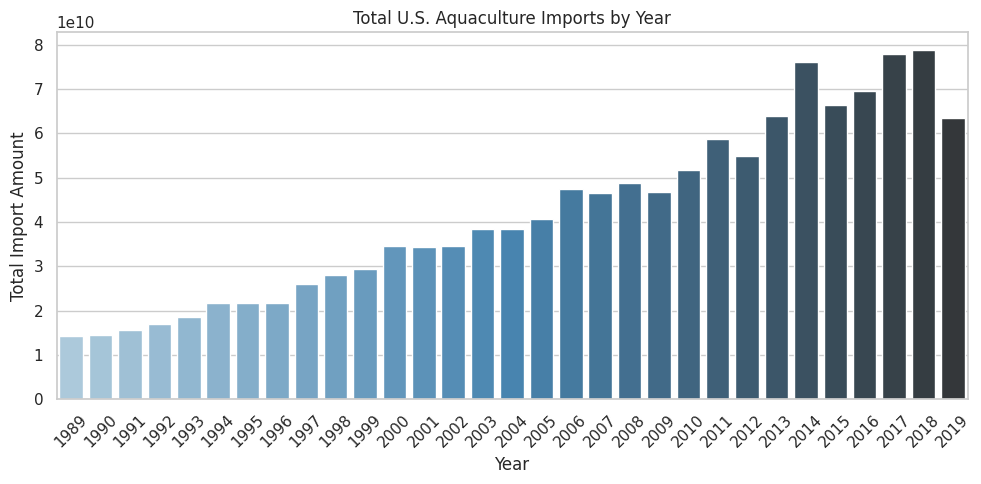

In [8]:
# Group total amount per year
yearly_data = df.groupby('YEAR_ID')['AMOUNT'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_data, x='YEAR_ID', y='AMOUNT', palette='Blues_d')
plt.title('Total U.S. Aquaculture Imports by Year')
plt.xlabel('Year')
plt.ylabel('Total Import Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Drop NA and sort
df_clean = df[['YEAR_ID', 'AMOUNT']].dropna().sort_values('YEAR_ID')

# X = Year (independent), y = Amount (dependent)
X = df_clean['YEAR_ID']
y = df_clean['AMOUNT']

# Add constant for statsmodels
X_with_const = sm.add_constant(X)


In [10]:
model = sm.OLS(y, X_with_const)
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 AMOUNT   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2302.
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:57:20   Log-Likelihood:            -1.1211e+07
No. Observations:              627381   AIC:                         2.242e+07
Df Residuals:                  627379   BIC:                         2.242e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.912e+08   4.03e+06    -47.464      0.0

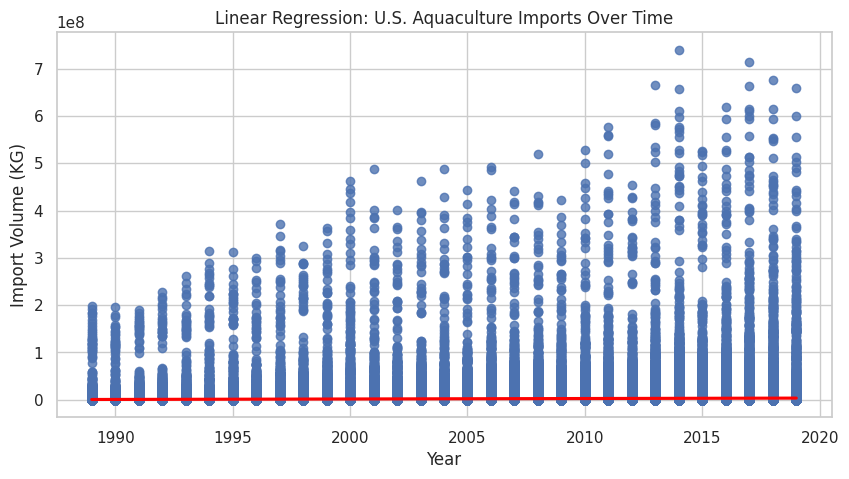

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.regplot(x='YEAR_ID', y='AMOUNT', data=df_clean, label = 'data points', ci=95, line_kws={"color": "red"})
plt.title("Linear Regression: U.S. Aquaculture Imports Over Time")
plt.xlabel("Year")
plt.ylabel("Import Volume (KG)")
plt.show()


Pearson Correlation Coefficient: 0.9767
P-value: 6.1820e-21


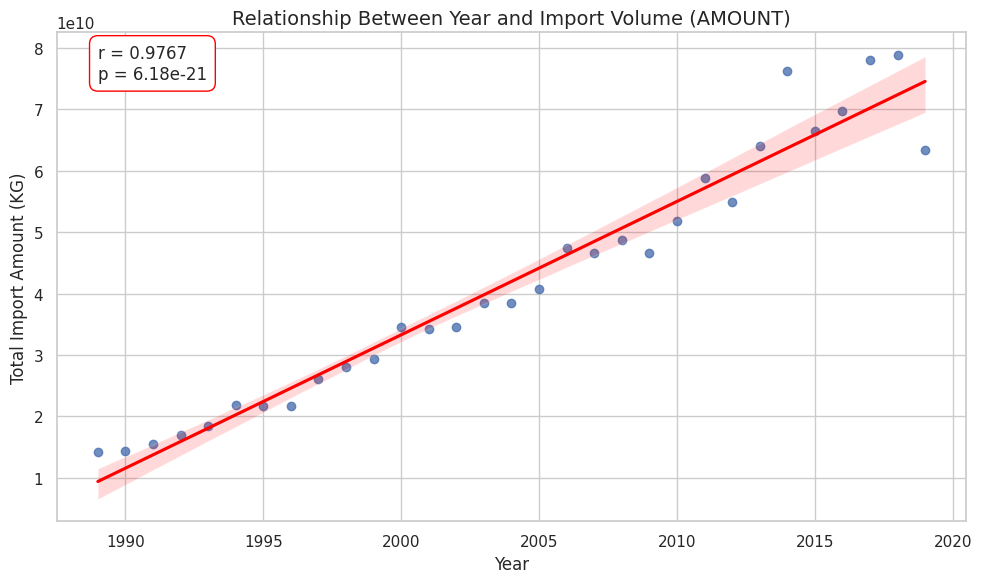

In [12]:
# Group by year (if multiple records per year) and sum the total imports per year
yearly_data = df.groupby('YEAR_ID')['AMOUNT'].sum().reset_index()

# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(yearly_data['YEAR_ID'], yearly_data['AMOUNT'])
# Calculate Pearson correlation
r, p = stats.pearsonr(yearly_data['YEAR_ID'], yearly_data['AMOUNT'])
# Print correlation results
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='YEAR_ID', y='AMOUNT', data=yearly_data, line_kws={'color': 'red'})
plt.title('Relationship Between Year and Import Volume (AMOUNT)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Import Amount (KG)')
plt.grid(True)
# Annotate correlation and p-value
plt.text(x=yearly_data['YEAR_ID'].min(),
         y=yearly_data['AMOUNT'].max() * 0.95,
         s=f"r = {r:.4f}\np = {p:.2e}",
         fontsize=12,
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
plt.tight_layout()
plt.show()